In [4]:
from utils_methods import raydepth2depth, load_color_image, load_depth_map, load_normal_map, compute_variation, sobel_line_neighborhood, overlay_lines_on_image_custom
from upload_hypersim import upload_images 
import os
import numpy as np
import cv2
import torch
import h5py
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from deeplsd.utils.tensor import batch_to_device
from deeplsd.models.deeplsd_inference import DeepLSD
from deeplsd.geometry.viz_2d import plot_images, plot_lines

# Load an image from the Hypersim dataset
image_path = '../assets/data/ai_001_001/images/scene_cam_00_final_preview/frame.0001.color.jpg'
img = cv2.imread(image_path)[:, :, ::-1]
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Load depth and normal maps
depth_path = '../assets/data/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0001.depth_meters.hdf5'
normal_path = '../assets/data/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0001.normal_world.hdf5'
position_path = '../assets/data/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0001.position.hdf5'

with h5py.File(depth_path, 'r') as f:
    depth_map = np.array(f['dataset'])
with h5py.File(normal_path, 'r') as f:
    normal_map = np.array(f['dataset'])
with h5py.File(position_path, "r") as f:
    world_coordinates = np.array(f["dataset"])

depth_map = depth_map.astype(np.float32)
normal_map = normal_map.astype(np.float32)
world_coordinates = world_coordinates.astype(np.float32)

# Initialize DeepLSD model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
conf = {'detect_lines': True, 'line_detection_params': {'merge': False, 'filtering': True, 'grad_thresh': 3}}
ckpt = torch.load('../weights/deeplsd_md.tar', map_location='cpu', weights_only=False)
net = DeepLSD(conf)
net.load_state_dict(ckpt['model'])
net = net.to(device).eval()



[Parameter Comparison] Processing image: ai_001_001 for frame 0001
data/ai_001_001/ai_001_001/images/scene_cam_00_final_preview/frame.0001.color.jpg
data/ai_001_001/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0001.normal_world.hdf5
data/ai_001_001/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0001.depth_meters.hdf5
[Neighborhood Method] ai_001_001: Detected 398 lines; 398 classified as structural.


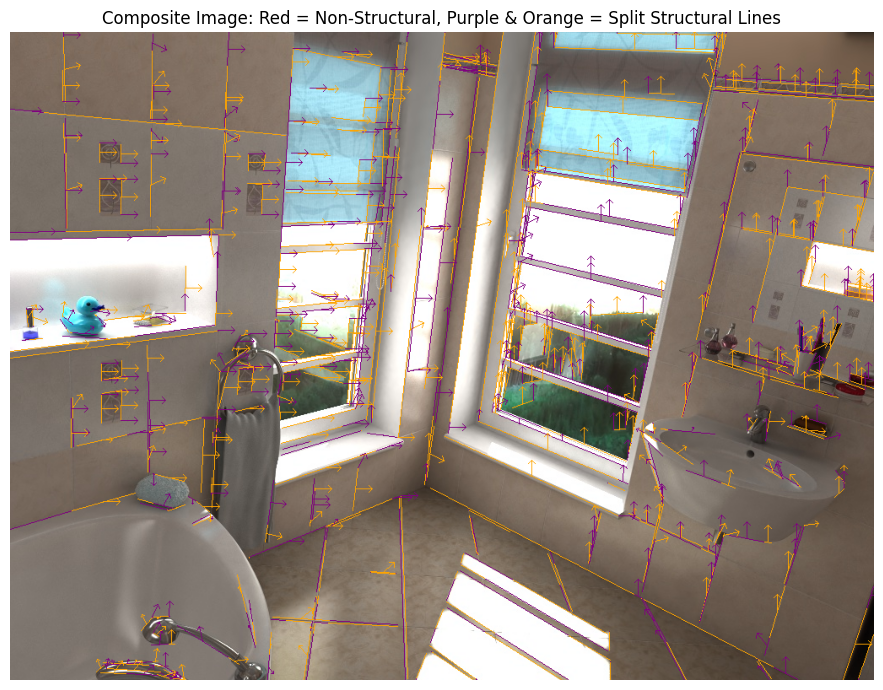


[Parameter Comparison] Processing image: ai_001_004 for frame 0001
data/ai_001_004/ai_001_004/images/scene_cam_00_final_preview/frame.0001.color.jpg
data/ai_001_004/ai_001_004/images/scene_cam_00_geometry_hdf5/frame.0001.normal_world.hdf5
data/ai_001_004/ai_001_004/images/scene_cam_00_geometry_hdf5/frame.0001.depth_meters.hdf5
[Neighborhood Method] ai_001_004: Detected 377 lines; 377 classified as structural.


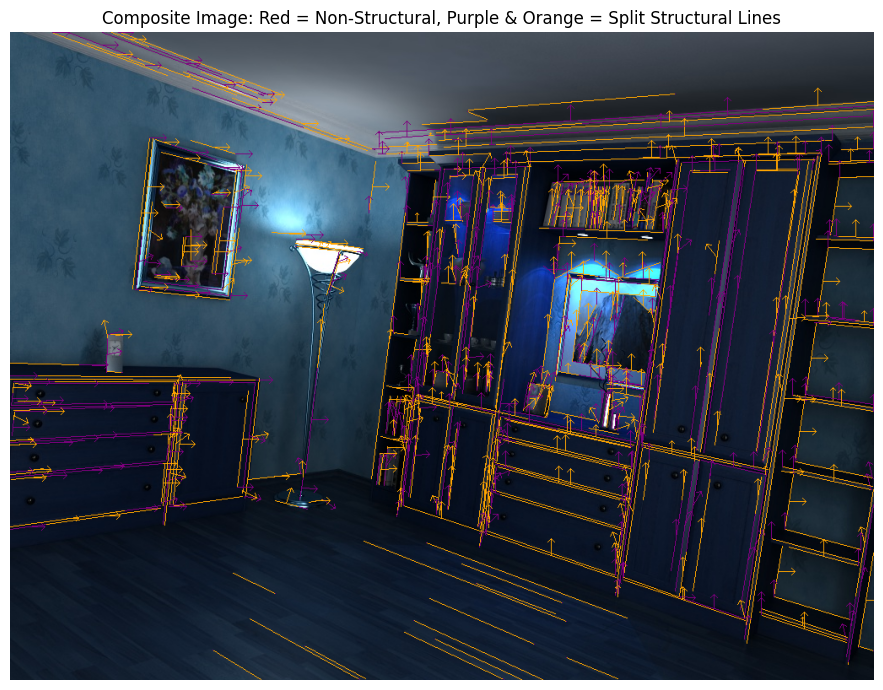


[Parameter Comparison] Processing image: ai_001_005 for frame 0001
data/ai_001_005/ai_001_005/images/scene_cam_00_final_preview/frame.0001.color.jpg
data/ai_001_005/ai_001_005/images/scene_cam_00_geometry_hdf5/frame.0001.normal_world.hdf5
data/ai_001_005/ai_001_005/images/scene_cam_00_geometry_hdf5/frame.0001.depth_meters.hdf5
[Neighborhood Method] ai_001_005: Detected 461 lines; 461 classified as structural.


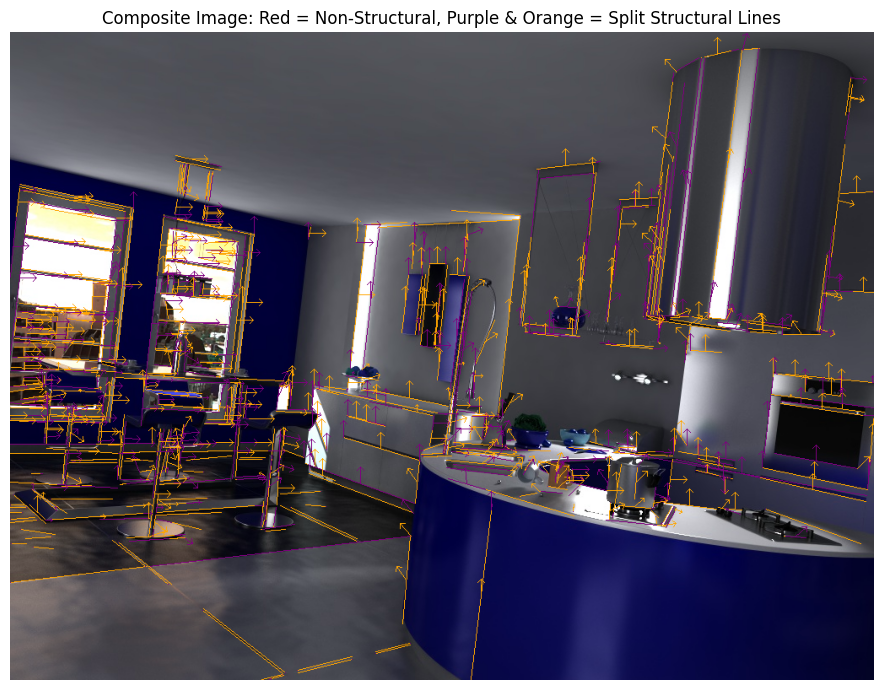


[Parameter Comparison] Processing image: ai_001_006 for frame 0001
data/ai_001_006/ai_001_006/images/scene_cam_00_final_preview/frame.0001.color.jpg
data/ai_001_006/ai_001_006/images/scene_cam_00_geometry_hdf5/frame.0001.normal_world.hdf5
data/ai_001_006/ai_001_006/images/scene_cam_00_geometry_hdf5/frame.0001.depth_meters.hdf5
[Neighborhood Method] ai_001_006: Detected 480 lines; 480 classified as structural.


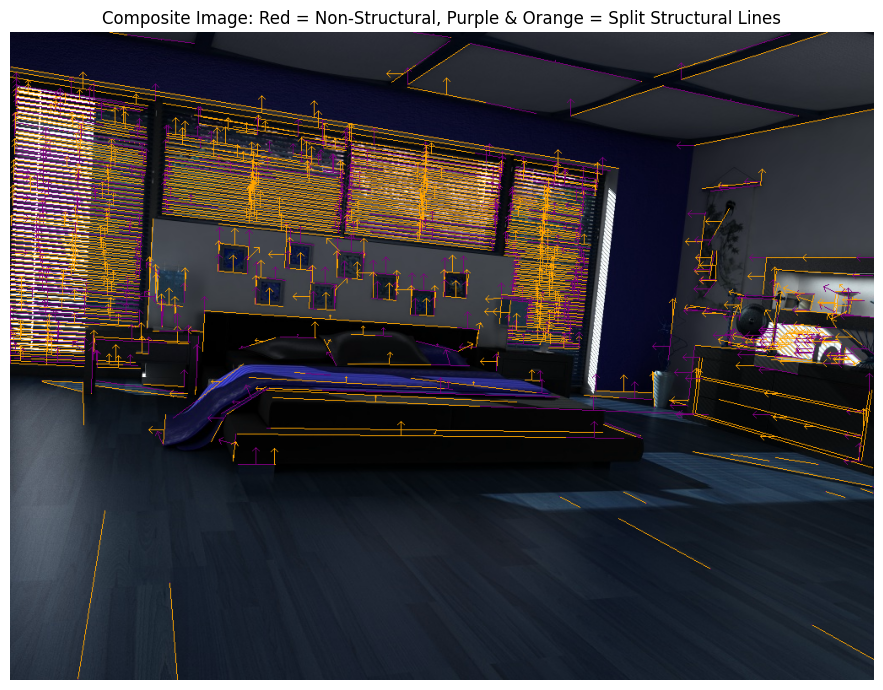


[Parameter Comparison] Processing image: ai_001_007 for frame 0001
data/ai_001_007/ai_001_007/images/scene_cam_00_final_preview/frame.0001.color.jpg
data/ai_001_007/ai_001_007/images/scene_cam_00_geometry_hdf5/frame.0001.normal_world.hdf5
data/ai_001_007/ai_001_007/images/scene_cam_00_geometry_hdf5/frame.0001.depth_meters.hdf5
[Neighborhood Method] ai_001_007: Detected 490 lines; 490 classified as structural.


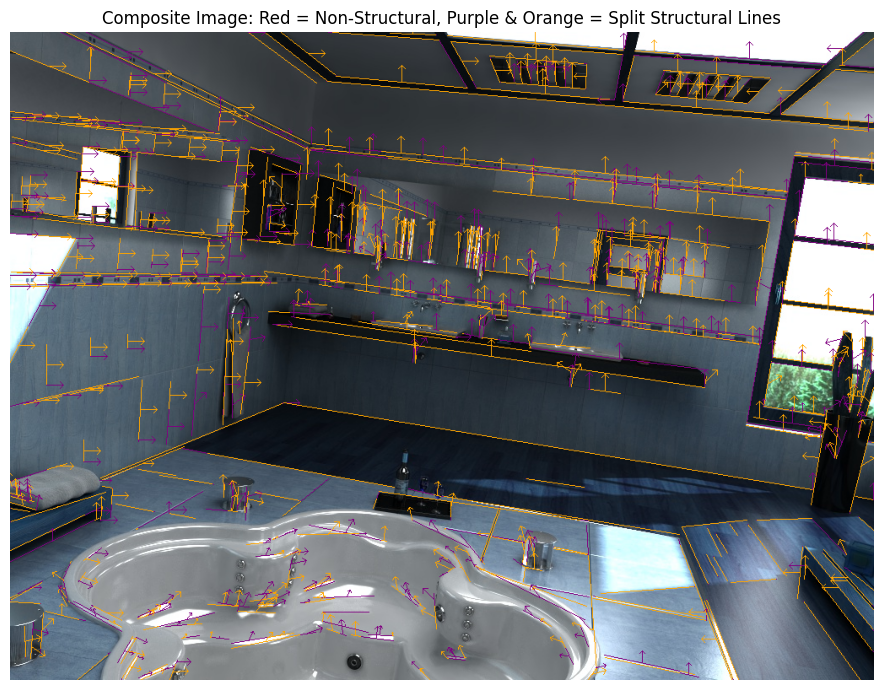


[Parameter Comparison] Processing image: ai_001_008 for frame 0001
data/ai_001_008/ai_001_008/images/scene_cam_00_final_preview/frame.0001.color.jpg
data/ai_001_008/ai_001_008/images/scene_cam_00_geometry_hdf5/frame.0001.normal_world.hdf5
data/ai_001_008/ai_001_008/images/scene_cam_00_geometry_hdf5/frame.0001.depth_meters.hdf5
[Neighborhood Method] ai_001_008: Detected 437 lines; 437 classified as structural.


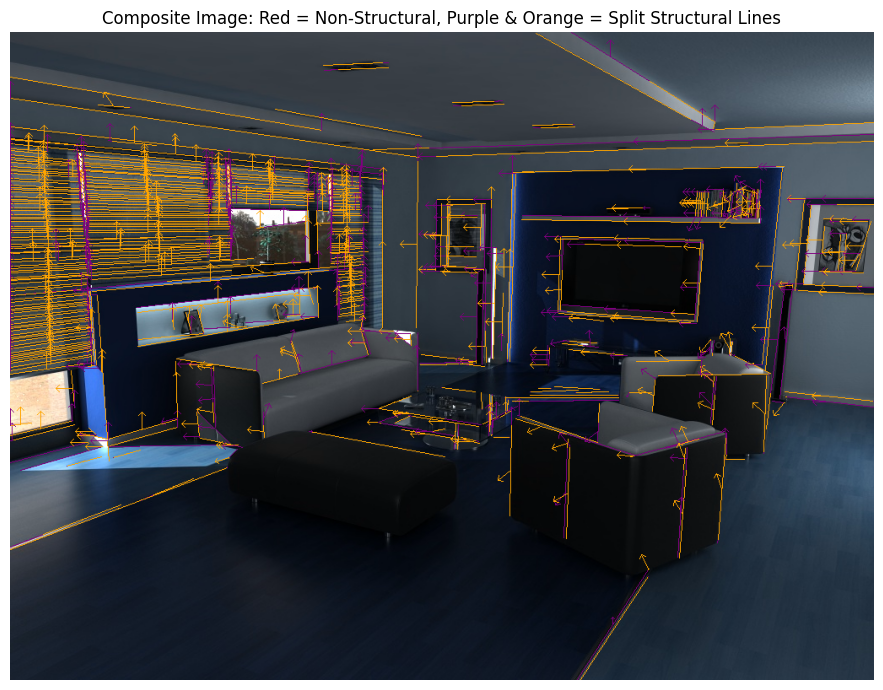


[Parameter Comparison] Processing image: ai_001_009 for frame 0001
data/ai_001_009/ai_001_009/images/scene_cam_00_final_preview/frame.0001.color.jpg
data/ai_001_009/ai_001_009/images/scene_cam_00_geometry_hdf5/frame.0001.normal_world.hdf5
data/ai_001_009/ai_001_009/images/scene_cam_00_geometry_hdf5/frame.0001.depth_meters.hdf5
[Neighborhood Method] ai_001_009: Detected 189 lines; 189 classified as structural.


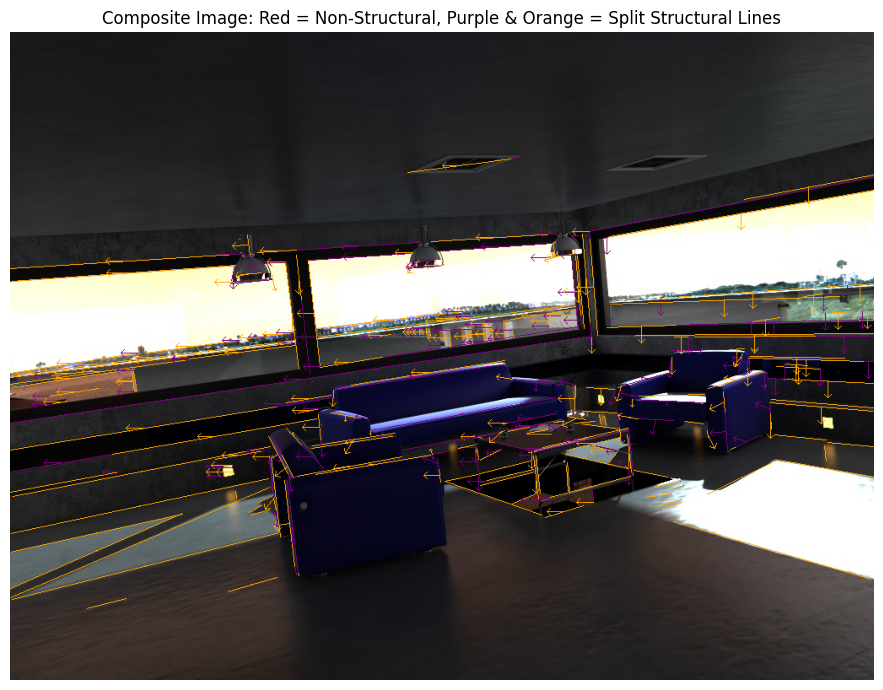


[Parameter Comparison] Processing image: ai_002_001 for frame 0001
data/ai_002_001/ai_002_001/images/scene_cam_00_final_preview/frame.0001.color.jpg
data/ai_002_001/ai_002_001/images/scene_cam_00_geometry_hdf5/frame.0001.normal_world.hdf5
data/ai_002_001/ai_002_001/images/scene_cam_00_geometry_hdf5/frame.0001.depth_meters.hdf5
[Neighborhood Method] ai_002_001: Detected 497 lines; 497 classified as structural.


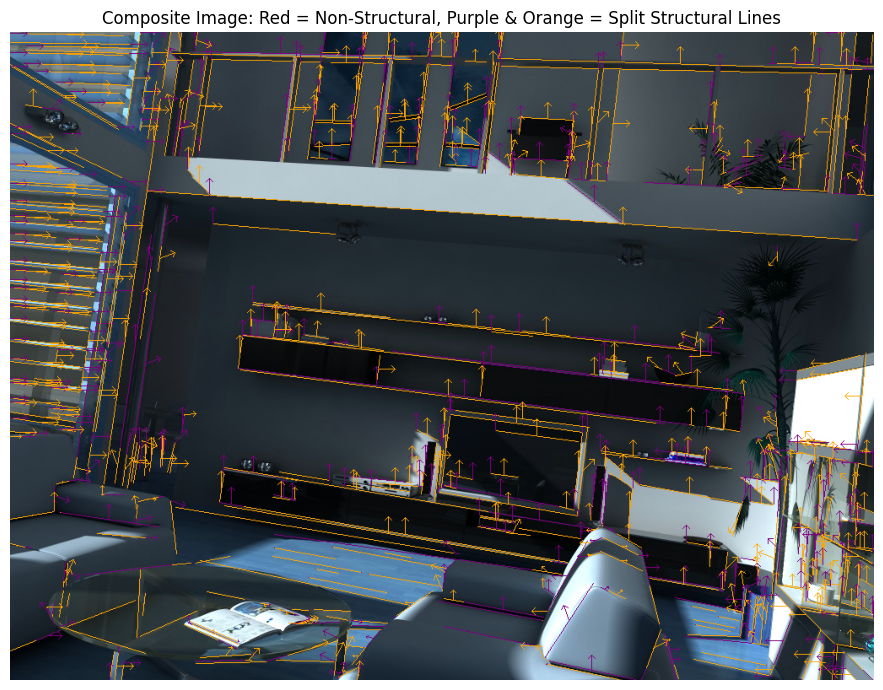


[Parameter Comparison] Processing image: ai_002_003 for frame 0001
data/ai_002_003/ai_002_003/images/scene_cam_00_final_preview/frame.0001.color.jpg
data/ai_002_003/ai_002_003/images/scene_cam_00_geometry_hdf5/frame.0001.normal_world.hdf5
data/ai_002_003/ai_002_003/images/scene_cam_00_geometry_hdf5/frame.0001.depth_meters.hdf5
[Neighborhood Method] ai_002_003: Detected 889 lines; 889 classified as structural.


KeyboardInterrupt: 

In [8]:
import numpy as np
import cv2
import torch
import matplotlib.pyplot as plt
import os

def process_image(image_dir, image_id, frame_str, net, device,
                  depth_thresh, normal_thresh, thickness,
                  method="neighborhood", depth_normal_func=np.max,
                  depth_normal_func_str="Max", norm_agg_func=np.sum,
                  struct_color=(0, 0, 255), text_color=(255, 0, 0)):
    """
    Process a single image and plot the composite image with non-structural lines in red 
    and split structural lines in purple and orange.
    
    Non-structural lines are drawn using text_color (red).
    For each structural line that is split, the first segment is drawn in purple and the 
    second in orange.
    """
    # Load image data (assumes these helper functions are implemented)
    cam_view_color = "scene_cam_00_final_preview"
    cam_view_geom = "scene_cam_00_geometry_hdf5"

    color_img = load_color_image(image_dir, image_id, frame_str, cam_view_color)
    normal_map = load_normal_map(image_dir, image_id, frame_str, cam_view_geom)
    depth_map = load_depth_map(image_dir, image_id, frame_str, cam_view_geom)
    
    if color_img is None or depth_map is None or normal_map is None:
        print(f"Missing data in {image_dir}; skipping processing.")
        return None

    h, w = color_img.shape[:2]
    fov_x = np.pi / 3 
    f = w / (2 * np.tan(fov_x / 2))
    default_K = np.array([[f, 0, w / 2], [0, f, h / 2], [0, 0, 1]])
    
    depth_map = raydepth2depth(depth_map, default_K)
    gray_img = cv2.cvtColor(color_img, cv2.COLOR_RGB2GRAY)
    
    # Detect lines with DeepLSD.
    input_tensor = torch.tensor(gray_img, dtype=torch.float32, device=device)[None, None] / 255.
    with torch.no_grad():
        out = net({'image': input_tensor})
        pred_lines = out['lines'][0]
        if isinstance(pred_lines, torch.Tensor):
            pred_lines = pred_lines.cpu().numpy()
    
    # Compute variation maps for depth and normal.
    sobel_depth_map = compute_variation(depth_map, 11)
    sobel_normal_map = compute_variation(normal_map, 27)
    sobel_normal_map = norm_agg_func(sobel_normal_map, axis=2)
        
    # Classify each predicted line as structural or non-structural.
    is_struct = []
    for l in pred_lines:
        ld_neigh, ln_neigh = sobel_line_neighborhood(sobel_depth_map, sobel_normal_map, l, thickness=thickness)
        max_depth = depth_normal_func(ld_neigh)
        max_normal = depth_normal_func(ln_neigh)
        depth_bool = max_depth > depth_thresh
        normal_bool = max_normal > normal_thresh
        is_struct.append(depth_bool or normal_bool)

    print(f"[{method.capitalize()} Method] {os.path.basename(image_dir)}: Detected {len(pred_lines)} lines; {sum(is_struct)} classified as structural.")

    # Define colors:
    # Non-structural: text_color (red after conversion to RGB).
    non_structural_color = text_color
    # Structural split segments: first segment purple, second segment orange.
    structural_color1 = (128, 0, 128)  # purple in BGR (remains the same in RGB)
    structural_color2 = (0, 165, 255)  # orange in BGR (becomes orange in RGB after conversion)

    # Create composite image.
    composite_after = color_img.copy()

    num_samples = 100  # For structural splitting.
    offset_px = 1      # Pixel offset for sampling normals.

    # Iterate over all predicted lines.
    for i, l in enumerate(pred_lines):
        # Unpack endpoints; predicted lines are assumed to be 2x2 arrays.
        pt1, pt2 = l
        x1, y1 = pt1
        x2, y2 = pt2

        if not is_struct[i]:
            # Non-structural line: draw the unsplit line in red.
            cv2.line(composite_after, (int(round(x1)), int(round(y1))), 
                     (int(round(x2)), int(round(y2))), non_structural_color, thickness)
        else:
            # Structural line: split the line into two segments.
            d = np.array([x2 - x1, y2 - y1], dtype=np.float32)
            d_norm = np.linalg.norm(d)
            if d_norm < 1e-6:
                continue  # Skip degenerate lines.
            d = d / d_norm
            # Compute the perpendicular direction.
            p = np.array([-d[1], d[0]], dtype=np.float32)
            
            # Sample points along the line.
            xs = np.linspace(x1, x2, num_samples)
            ys = np.linspace(y1, y2, num_samples)
            sample_points = np.stack([xs, ys], axis=1)
            
            n_left_list = []
            n_right_list = []
            valid_sample_points = []
            for pt in sample_points:
                ix, iy = int(round(pt[0])), int(round(pt[1]))
                ix_left = int(round(pt[0] + offset_px * p[0]))
                iy_left = int(round(pt[1] + offset_px * p[1]))
                ix_right = int(round(pt[0] - offset_px * p[0]))
                iy_right = int(round(pt[1] - offset_px * p[1]))
                if (0 <= ix_left < w and 0 <= iy_left < h and 0 <= ix_right < w and 0 <= iy_right < h):
                    n_left = normal_map[iy_left, ix_left].astype(np.float32)
                    n_right = normal_map[iy_right, ix_right].astype(np.float32)
                    norm_left = np.linalg.norm(n_left)
                    norm_right = np.linalg.norm(n_right)
                    if norm_left > 0:
                        n_left = n_left / norm_left
                    if norm_right > 0:
                        n_right = n_right / norm_right
                    n_left_list.append(n_left)
                    n_right_list.append(n_right)
                    valid_sample_points.append(pt)
            
            if len(valid_sample_points) < 2:
                continue
            
            valid_sample_points = np.array(valid_sample_points)
            n_left_arr = np.array(n_left_list)
            n_right_arr = np.array(n_right_list)
            
            # Compute the angle between the two offset normals for each sample point.
            angles = []
            for nl, nr in zip(n_left_arr, n_right_arr):
                dot = np.clip(np.dot(nl, nr), -1.0, 1.0)
                angle = np.arccos(dot)
                angles.append(angle)
            angles = np.array(angles)
            
            # Use the sample with maximum difference to split the line.
            split_idx = int(np.argmax(angles))
            split_point = valid_sample_points[split_idx]
            
            seg1 = np.array([[x1, y1], split_point], dtype=np.float32)
            seg2 = np.array([split_point, [x2, y2]], dtype=np.float32)
            
            pts1 = seg1.astype(np.int32)
            pts2 = seg2.astype(np.int32)
            # Draw the two segments with different colors.
            cv2.line(composite_after, (pts1[0,0], pts1[0,1]), (pts1[1,0], pts1[1,1]), structural_color1, thickness)
            cv2.line(composite_after, (pts2[0,0], pts2[0,1]), (pts2[1,0], pts2[1,1]), structural_color2, thickness)
            
            # (Optional) Draw representative normals as arrows for each segment.
            def get_segment_normal(mid_pt, side_sign):
                ix = int(round(mid_pt[0] + side_sign * offset_px * p[0]))
                iy = int(round(mid_pt[1] + side_sign * offset_px * p[1]))
                if 0 <= ix < w and 0 <= iy < h:
                    n = normal_map[iy, ix].astype(np.float32)
                    norm_val = np.linalg.norm(n)
                    if norm_val > 0:
                        n = n / norm_val
                    return n
                else:
                    return np.array([0, 0, 0], dtype=np.float32)
            
            mid_seg1 = (seg1[0] + seg1[1]) / 2.
            mid_seg2 = (seg2[0] + seg2[1]) / 2.
            n_seg1 = get_segment_normal(mid_seg1, side_sign=1)
            n_seg2 = get_segment_normal(mid_seg2, side_sign=-1)
            mid1 = ((pts1[0,0] + pts1[1,0]) // 2, (pts1[0,1] + pts1[1,1]) // 2)
            mid2 = ((pts2[0,0] + pts2[1,0]) // 2, (pts2[0,1] + pts2[1,1]) // 2)
            n_vis1 = (n_seg1[:2] * 20).astype(np.int32)
            n_vis2 = (n_seg2[:2] * 20).astype(np.int32)
            cv2.arrowedLine(composite_after, mid1, (mid1[0] + n_vis1[0], mid1[1] + n_vis1[1]), structural_color1, 1, tipLength=0.3)
            cv2.arrowedLine(composite_after, mid2, (mid2[0] + n_vis2[0], mid2[1] + n_vis2[1]), structural_color2, 1, tipLength=0.3)

    # === Plot the composite image (non-structural in red, structural segments in purple and orange) ===
    plt.figure(figsize=(10, 7))
    plt.imshow(cv2.cvtColor(composite_after, cv2.COLOR_BGR2RGB))
    plt.title("Composite Image: Red = Non-Structural, Purple & Orange = Split Structural Lines")
    plt.axis("off")
    plt.tight_layout()
    plt.show()
    
    return composite_after


# Define what to import
frame_str = "0001"
# images
desired_images = [
    "ai_001_001",
    "ai_001_004",
    "ai_001_005",
    "ai_001_006",
    "ai_001_007",
    "ai_001_008",
    "ai_001_009",
    "ai_002_001",
    "ai_002_003",
    "ai_002_004",
    "ai_002_005",
    "ai_002_006",
]
#files
files_to_download = [
    f"frame.{frame_str}.color.jpg",
    f"frame.{frame_str}.depth_meters.hdf5",
    f"frame.{frame_str}.normal_world.hdf5",
    f"frame.{frame_str}.normal_bump_world.hdf5",
    f"frame.{frame_str}.position.hdf5"
]

# Define the data directory and the images to process
# Define arrays for each parameter
depth_thresholds = 0.000004     
normal_thresholds = 0.000024      #Too high
thickness_values = 1   

base_data_dir = "data"
image_ids = desired_images
for image_id in image_ids:
    image_dir = os.path.join(base_data_dir, image_id)
    print(f"\n[Parameter Comparison] Processing image: {image_id} for frame {frame_str}")
    composite_after = process_image(image_dir, image_id, frame_str, net, device,
                                    depth_thresholds, normal_thresholds, thickness_values)


/var/folders/m2/lbk735w547j5jf8nwvk8vnj40000gn/T/ipykernel_52402/2258298997.py:113: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(unique_labels))


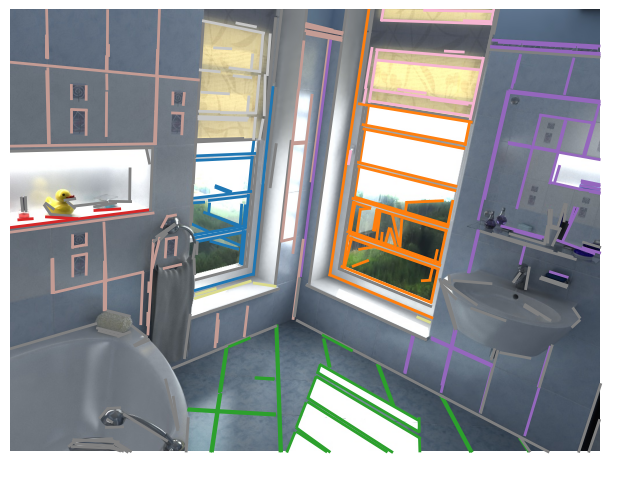

In [2]:
import numpy as np
import scipy.spatial.distance as dist


def mahalanobis_outlier_removal(normals, threshold=3.0):
    normals = np.array(normals)

    if normals.shape[0] < 3:  # Not enough data points
        return normals

    mean = np.mean(normals, axis=0)
    cov_matrix = np.cov(normals.T)

    # Regularization to avoid singular matrix
    cov_matrix += np.eye(cov_matrix.shape[0]) * 1e-6

    # Use pseudo-inverse if still singular
    try:
        inv_cov_matrix = np.linalg.inv(cov_matrix)
    except np.linalg.LinAlgError:
        inv_cov_matrix = np.linalg.pinv(cov_matrix)

    distances = np.array([dist.mahalanobis(n, mean, inv_cov_matrix) for n in normals])
    return normals[distances < threshold]

def compute_average_plane(points, normals):
    """
    Compute an average plane equation ax + by + cz + d = 0 
    for a set of 3D points and their corresponding normal vectors.

    Parameters:
    
    points (np.ndarray): Nx3 array of 3D points along a line.
    normals (np.ndarray): Nx3 array of normal vectors at each point.

        Returns:
        
    np.ndarray: Plane equation coefficients [a, b, c, d]."""
    if len(points) < 3:
        return None  # Not enough points to define a plane
    
    filtered_normals_dbscan = mahalanobis_outlier_removal(normals, threshold=1.5) #thickness2: eps=0.2, thickness3: eps=0.5

    # Compute the average normal vector
    avg_normal = np.mean(filtered_normals_dbscan, axis=0)
    avg_normal /= np.linalg.norm(avg_normal)  # Normalize it

    # Compute the average point on the line
    avg_point = np.mean(points, axis=0)

    # Compute d using the plane equation formula: ax + by + cz + d = 0
    a, b, c = avg_normal
    d = -np.dot(avg_normal, avg_point)

    return np.array([a, b, c, d])  # Return plane coefficients
def get_line_pixels(line, maps):
    """
    Get all pixel coordinates along a line using cv2.line.
    """
    x1, y1 = map(int, line[0])
    x2, y2 = map(int, line[1])
    height, width = maps.shape[:2]

    blank_image = np.zeros((height, width), dtype=np.uint8)
    cv2.line(blank_image, (x1, y1), (x2, y2), color=255, thickness=3)
    
    y_coords, x_coords = np.where(blank_image == 255)
    return list(zip(x_coords, y_coords))

def extract_line_features(lines, normal_map, world_coordinates):
    """
    Extract spatial and normal features for each line.
    """
    line_features = []
    for line in lines:
        pixel_coords = get_line_pixels(line, depth_map)

        points, normals = [], []
        for x, y in pixel_coords:
            points.append(world_coordinates[y, x])
            normals.append(normal_map[y, x])

        if len(points) > 2:
            plane = compute_average_plane(np.array(points), np.array(normals))
            if plane is not None:
                line_features.append(plane)

    return np.array(line_features, dtype=object)

def cluster_coplanar_lines(line_features, eps=0.5, min_samples=5):
    """
    Cluster coplanar lines using DBSCAN.
    """
    if len(line_features) == 0:
        return []

    # Feature vector: (plane normal x, y, z, centroid x, y, z)
    # feature_matrix = np.array([np.hstack((plane[:3], centroid)) for plane, centroid, _ in line_features])
    feature_matrix = line_features
    # DBSCAN Clustering
    clustering = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean').fit(feature_matrix)
    return clustering.labels_

# Extract features
line_features = extract_line_features(pred_lines, normal_map, world_coordinates)


# Apply DBSCAN
coplanar_clusters = cluster_coplanar_lines(line_features, min_samples=4, eps=0.2) #thickness2: eps=0.6, thickness3: eps=0.2 

# Visualization Function
def plot_coplanar_lines(lines, labels, image):
    unique_labels = set(labels)
    colors = plt.cm.get_cmap("tab20", len(unique_labels))

    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    for idx, line in enumerate(lines):
        label = labels[idx]
        if label == -1:  # Outliers
            color = 'grey'
        else:
            color = colors(label)[:3]  # Get unique color

        plt.plot([line[0, 0], line[1, 0]], [line[0, 1], line[1, 1]], color=color, linewidth=2)
    plt.axis("off")
    plt.show()

# Plot results
plot_coplanar_lines(pred_lines, coplanar_clusters, img)